# Using Little VGG for emotion detection

Training Emotion Detector

In [2]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization,Conv2D,MaxPooling2D
import os

num_classes=6
img_rows,img_cols=48,48
batch_size=18

train_data_dir='./Dataset/train'
validation_data_dir='./Dataset/validation'

#data augmentation
train_datagen=ImageDataGenerator(
             rescale=1./255,
             rotation_range=30,
             shear_range=0.5,
             width_shift_range=0.6,
             height_shift_range=0.3,
             horizontal_flip=True,
             fill_mode='nearest')

validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
            train_data_dir,
            color_mode='grayscale',
            target_size=(img_rows,img_cols),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True)

validation_generator=validation_datagen.flow_from_directory(
            validation_data_dir,
            color_mode='grayscale',
            target_size=(img_rows,img_cols),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True)

Found 24264 images belonging to 6 classes.
Found 4616 images belonging to 6 classes.


Keras Little VGG Model

In [4]:
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation,Flatten,Dropout,Dense

In [5]:
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

# Creating my own model

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint=ModelCheckpoint('./emotion_little_vgg.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbode=1)

earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                            factor=0.2,
                            patience=3,
                            verbose=1,min_delta=0.0001)

callbacks=(earlystop,checkpoint,reduce_lr)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

nb_train_samples=24264
nb_validation_samples=4616
epochs=12

history=model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples//batch_size,
        epochs=epochs,
        callbacks=callbacks,
        validation_steps=nb_validation_samples//batch_size,
        validation_data=validation_generator)

Epoch 1/12
1348/1348 [==============================] - 928s 677ms/step - loss: 2.2897 - accuracy: 0.1909 - val_loss: 1.7568 - val_accuracy: 0.1799
Epoch 2/12
1348/1348 [==============================] - 915s 679ms/step - loss: 1.7547 - accuracy: 0.2185 - val_loss: 1.7294 - val_accuracy: 0.2493
Epoch 3/12
1348/1348 [==============================] - 678s 503ms/step - loss: 1.7297 - accuracy: 0.2327 - val_loss: 1.8059 - val_accuracy: 0.1882
Epoch 4/12
1348/1348 [==============================] - 518s 384ms/step - loss: 1.7054 - accuracy: 0.2563 - val_loss: 1.6603 - val_accuracy: 0.3140
Epoch 5/12
1348/1348 [==============================] - 382s 283ms/step - loss: 1.6767 - accuracy: 0.2756 - val_loss: 1.7374 - val_accuracy: 0.3203
Epoch 6/12
1348/1348 [==============================] - 386s 286ms/step - loss: 1.6229 - accuracy: 0.3295 - val_loss: 1.4279 - val_accuracy: 0.4638
Epoch 7/12
1348/1348 [==============================] - 384s 285ms/step - loss: 1.5393 - accuracy: 0.3902 - val_

# Creating confusion matrix

Found 4616 images belonging to 6 classes.
Confusion Matrix
[[   0    0  491    0    0    0]
 [   0    0  637    0    0    2]
 [   0    0  872    0    0    7]
 [   0    0 1210    0    0    6]
 [   0    0  591    0    0    3]
 [   0    0  796    0    0    1]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       491
        Fear       0.00      0.00      0.00       639
       Happy       0.19      0.99      0.32       879
     Neutral       0.00      0.00      0.00      1216
         Sad       0.00      0.00      0.00       594
    Surprise       0.05      0.00      0.00       797

    accuracy                           0.19      4616
   macro avg       0.04      0.17      0.05      4616
weighted avg       0.05      0.19      0.06      4616



c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


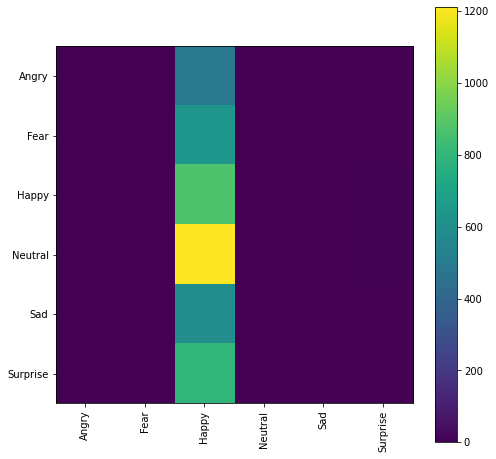

In [8]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

nb_train_samples=24264
nb_validation_samples=4616

#recreate our validation generator with shuffle=false
validation_generator=validation_datagen.flow_from_directory(
            validation_data_dir,
            color_mode='grayscale',
            target_size=(img_rows,img_cols),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False)
class_labels=validation_generator.class_indices
class_labels={v: k for k,v in class_labels.items()}
classes=list(class_labels.values())

# confusion matrix and classification report
Y_pred=model.predict(validation_generator,nb_validation_samples // batch_size+1)
y_pred=np.argmax(Y_pred,axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes,y_pred))
print('Classification Report')
target_names=list(class_labels.values())
print(classification_report(validation_generator.classes,y_pred,target_names=target_names,zero_division='warn',digits=2))

plt.figure(figsize=(8,8))
cnf_matrix=confusion_matrix(validation_generator.classes,y_pred)

plt.imshow(cnf_matrix,interpolation='nearest')
plt.colorbar()
tick_marks=np.arange(len(classes))
_=plt.xticks(tick_marks,classes,rotation=90)
_=plt.yticks(tick_marks,classes)

# Loading my saved model

In [9]:
from keras.models import load_model
classifier=load_model("emotion_little_vgg.h5")

In [ ]:
# g my class labels